In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('final_df.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
0,Psycho,1960,USA,English,109,"Horror, Mystery, Thriller",Alfred Hitchcock,Shamley Productions,A Phoenix secretary embezzles forty thousand d...,$ 806947,...,USA,NaN,NaN,806947.0,Anthony Perkins,D,Vera Miles,D,John Gavin,D
1,Spartacus,1960,USA,English,197,"Adventure, Biography, Drama",Stanley Kubrick,Bryna Productions,The slave Spartacus leads a violent revolt aga...,$ 12000000,...,USA,NaN,NaN,12000000.0,Kirk Douglas,D,Laurence Olivier,D,Jean Simmons,D
2,Swiss Family Robinson,1960,USA,English,126,"Adventure, Family",Ken Annakin,Walt Disney Productions,A Swiss family must survive being shipwrecked ...,$ 5000000,...,USA,NaN,NaN,5000000.0,John Mills,D,Dorothy McGuire,D,James MacArthur,D
3,One Hundred and One Dalmatians,1961,USA,English,79,"Animation, Adventure, Comedy","Clyde Geronimi, Hamilton Luske",Walt Disney Productions,When a litter of Dalmatian puppies are abducte...,$ 4000000,...,USA,NaN,NaN,4000000.0,Rod Taylor,D,J. Pat O'Malley,D,Betty Lou Gerson,D
4,Une femme est une femme,1961,"France, Italy",French,85,"Comedy, Drama, Romance",Jean-Luc Godard,Euro International Film (EIA),A French striptease artist is desperate to bec...,$ 160000,...,France,Italy,NaN,160000.0,Jean-Claude Brialy,D,Anna Karina,D,Jean-Paul Belmondo,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,Captive State,2019,USA,English,109,"Drama, Sci-Fi, Thriller",Rupert Wyatt,DreamWorks,Set in a Chicago neighborhood nearly a decade ...,$ 25000000,...,USA,NaN,NaN,25000000.0,John Goodman,A,Ashton Sanders,D,Jonathan Majors,D
4144,The Angry Birds Movie 2,2019,"Finland, USA",English,97,"Animation, Adventure, Comedy","Thurop Van Orman, John Rice",Sony Pictures Animation,The flightless birds and scheming green pigs t...,$ 65000000,...,Finland,USA,NaN,65000000.0,Jason Sudeikis,B,Josh Gad,A,Leslie Jones,D
4145,The Lion King,2019,USA,English,118,"Animation, Adventure, Drama",Jon Favreau,Fairview Entertainment,"After the murder of his father, a young lion p...",$ 260000000,...,USA,NaN,NaN,260000000.0,Chiwetel Ejiofor,A,John Oliver,B,James Earl Jones,B
4146,The Kitchen,2019,USA,English,102,"Action, Crime, Drama",Andrea Berloff,BRON Studios,The wives of New York gangsters in Hell's Kitc...,$ 38000000,...,USA,NaN,NaN,38000000.0,Melissa McCarthy,B,Tiffany Haddish,C,Elisabeth Moss,D


In [3]:
df['worlwide_gross_income'] = df['worlwide_gross_income'].str.replace("$",' ')
# .astype(float)
df['usa_gross_income']=df['usa_gross_income'].str.replace("$",' ').astype(float)


In [4]:
df['worlwide_gross_income'] = df['worlwide_gross_income'].astype(float)
df.head()

,title,year,country,language,duration,genre,director,production_company,description,budget,...,country_1,country_2,country_3,budget_USD,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
0,Psycho,1960,USA,English,109,"Horror, Mystery, Thriller",Alfred Hitchcock,Shamley Productions,A Phoenix secretary embezzles forty thousand d...,$ 806947,...,USA,NaN,NaN,806947.0,Anthony Perkins,D,Vera Miles,D,John Gavin,D
1,Spartacus,1960,USA,English,197,"Adventure, Biography, Drama",Stanley Kubrick,Bryna Productions,The slave Spartacus leads a violent revolt aga...,$ 12000000,...,USA,NaN,NaN,12000000.0,Kirk Douglas,D,Laurence Olivier,D,Jean Simmons,D
2,Swiss Family Robinson,1960,USA,English,126,"Adventure, Family",Ken Annakin,Walt Disney Productions,A Swiss family must survive being shipwrecked ...,$ 5000000,...,USA,NaN,NaN,5000000.0,John Mills,D,Dorothy McGuire,D,James MacArthur,D
3,One Hundred and One Dalmatians,1961,USA,English,79,"Animation, Adventure, Comedy","Clyde Geronimi, Hamilton Luske",Walt Disney Productions,When a litter of Dalmatian puppies are abducte...,$ 4000000,...,USA,NaN,NaN,4000000.0,Rod Taylor,D,J. Pat O'Malley,D,Betty Lou Gerson,D
4,Une femme est une femme,1961,"France, Italy",French,85,"Comedy, Drama, Romance",Jean-Luc Godard,Euro International Film (EIA),A French striptease artist is desperate to bec...,$ 160000,...,France,Italy,NaN,160000.0,Jean-Claude Brialy,D,Anna Karina,D,Jean-Paul Belmondo,D


In [5]:
# df['worlwide_gross_income']
df = df[['title','year','country_1','country_2','country_3','language','duration','genre_1','genre_2','genre_3',
                    'production_company', 'director', 'description', 'actor_1','listing_1','actor_2','listing_2','actor_3','listing_3',
                     'budget_USD', 'usa_gross_income', 'worlwide_gross_income','IMDB_rating', 'votes','reviews_from_users','metascore',
                    'reviews_from_critics','male_avg_rating', 'male_votes', 'female_avg_rating','female_votes',
                     'avg_rating_<18yrs','votes_<18yrs', 'avg_rating_18-30yrs','votes_18-30yrs',
                     'avg_rating_30-45yrs','votes_30-45yrs', 'avg_rating_>45yrs','votes_>45yrs','positive_votes',
                     'neutral_votes', 'negative_votes', 'percentage_of_positive_reviews','overall_eval']]

# table_df[['number_votes_<18yrs','number_votes_18-30yrs', 'number_votes_30-45yrs', 'number_votes_>45yrs']] = table_df[['number_votes_<18yrs','number_votes_18-30yrs', 'number_votes_30-45yrs', 'number_votes_>45yrs']].round()
df=df.rename(columns={'IMDB_rating':'avg_user_rating'})
# df = df.reindex(['title'])
df

,title,year,country_1,country_2,country_3,language,duration,genre_1,genre_2,genre_3,...,votes_18-30yrs,avg_rating_30-45yrs,votes_30-45yrs,avg_rating_>45yrs,votes_>45yrs,positive_votes,neutral_votes,negative_votes,percentage_of_positive_reviews,overall_eval
0,Psycho,1960,USA,NaN,NaN,English,109,Horror,Mystery,Thriller,...,130264.0,8.4,200243.0,8.5,70585.0,509541,37238,8448,0.92,1
1,Spartacus,1960,USA,NaN,NaN,English,197,Adventure,Biography,Drama,...,16670.0,7.8,49635.0,8.0,23509.0,101184,12075,2545,0.87,1
2,Swiss Family Robinson,1960,USA,NaN,NaN,English,126,Adventure,Family,NaN,...,1555.0,7.2,4841.0,7.1,3165.0,9370,2922,305,0.74,1
3,One Hundred and One Dalmatians,1961,USA,NaN,NaN,English,79,Animation,Adventure,Comedy,...,45975.0,7.1,49250.0,7.3,11390.0,108703,31021,1998,0.77,1
4,Une femme est une femme,1961,France,Italy,NaN,French,85,Comedy,Drama,Romance,...,3760.0,7.5,5383.0,6.9,1789.0,10898,2362,424,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,Captive State,2019,USA,NaN,NaN,English,109,Drama,Sci-Fi,Thriller,...,10564.0,6.0,15809.0,6.0,3195.0,27819,10008,2489,0.69,1
4144,The Angry Birds Movie 2,2019,Finland,USA,NaN,English,97,Animation,Adventure,Comedy,...,1945.0,6.3,2891.0,6.2,624.0,4878,3349,569,0.55,0
4145,The Lion King,2019,USA,NaN,NaN,English,118,Animation,Adventure,Drama,...,38746.0,6.9,37888.0,7.0,6767.0,94591,31838,8847,0.70,1
4146,The Kitchen,2019,USA,NaN,NaN,English,102,Action,Crime,Drama,...,1013.0,5.2,1813.0,5.6,1014.0,1812,2669,1311,0.31,0


In [6]:
df.to_csv('complete_data.csv')

In [7]:
# table_df = df.head(30)
# table_df
# table_df.to_csv('data.csv')

In [8]:
df2 = df.dropna()
df2

,title,year,country_1,country_2,country_3,language,duration,genre_1,genre_2,genre_3,...,votes_18-30yrs,avg_rating_30-45yrs,votes_30-45yrs,avg_rating_>45yrs,votes_>45yrs,positive_votes,neutral_votes,negative_votes,percentage_of_positive_reviews,overall_eval
13,Cleopatra,1963,Switzerland,UK,USA,English,192,Biography,Drama,History,...,3592.0,7.0,10192.0,7.0,7412.0,18916,7308,894,0.70,1
25,Doctor Zhivago,1965,USA,Italy,UK,"English, Russian, French",197,Drama,Romance,War,...,7711.0,7.9,25109.0,8.1,17920.0,56076,7472,2019,0.86,1
56,Willy Wonka & the Chocolate Factory,1971,USA,East Germany,West Germany,"English, French, German, Italian",100,Family,Fantasy,Musical,...,36278.0,7.8,62731.0,7.9,22436.0,141478,20411,3495,0.86,1
126,Superman,1978,USA,UK,Canada,English,143,Action,Adventure,Drama,...,19880.0,7.3,66945.0,7.5,26768.0,117200,30044,3518,0.78,1
162,Superman II,1980,USA,UK,Canada,"English, French, Russian",127,Action,Adventure,Sci-Fi,...,10632.0,6.8,41519.0,6.9,17314.0,58834,30536,3382,0.63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4109,Godzilla: King of the Monsters,2019,Japan,Canada,USA,"English, Japanese, Chinese, Spanish",132,Action,Adventure,Fantasy,...,23299.0,6.0,31978.0,5.9,8381.0,47488,40949,9412,0.49,0
4110,Dumbo,2019,USA,UK,Australia,"English, French",112,Adventure,Family,Fantasy,...,11332.0,6.3,16901.0,6.4,4402.0,24940,21185,3192,0.51,0
4121,Terminator: Dark Fate,2019,USA,Spain,Hungary,"English, Spanish",128,Action,Adventure,Sci-Fi,...,6845.0,6.5,17489.0,6.5,4991.0,26974,12422,5427,0.60,1
4139,Cold Pursuit,2019,UK,Norway,Canada,"English, Vietnamese, Shoshoni",119,Action,Crime,Drama,...,7075.0,6.1,15471.0,6.3,6459.0,18319,20325,3317,0.44,0


In [9]:
table_df = df2
table_df
table_df.to_csv('table_data.csv', index=False)

In [10]:
# df.to_csv('IMDB.csv')

In [11]:
# Reading csv file
# df = pd.read_csv('IMDB.csv')
# df

In [12]:
# Statitics
# df.describe()

In [13]:
# df_corr = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','Ranking_1', 'Ranking_2', 'Ranking_3','votes', 'male_avg_rating', 'female_avg_rating', 
#          'avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']]
# df_corr = X
# df_corr

NameError: name 'X' is not defined

In [ ]:
#Using Pearson Correlation Matrix
plt.figure(figsize=(20,15))
# plt.subplots_adjust(top = 3.9)
# plt.subplots_adjust(right = 0.9)
cor = df_corr.corr()
sns.heatmap(cor ,annot=True, cmap=plt.cm.Reds)
plt.show()

# HOW TO KEEP VALUES INSIDE BOXES
# SHOULD I BE USING BOTH AGE AND GENDER RATINGS 
# => SEEMS TO BE CAUSE MULTICOLLINEARITY

In [ ]:
# df2 = df[['budget_USD', 'usa_gross_income', 'worlwide_gross_income', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']]

In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
labelencoder = LabelEncoder()
# df[['budget_USD', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']].apply(LabelEncoder().fit_transform)

# Model 1**

In [206]:
# Assign X and y values
# X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','production_company','Ranking_1', 'Ranking_2', 'Ranking_3','votes', 'percentage_male', 'percentage_female',
#         'percentage<18yrs', 'percentage18-30yrs', 'percentage30-45yrs', 'percentage>45yrs']].apply(LabelEncoder().fit_transform)
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
y = df2['avg_user_rating']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(485, 23) (485,)


In [207]:
X.head()

,budget_USD,usa_gross_income,duration,genre_1,genre_2,genre_3,country_1,country_2,country_3,director,...,listing_3,votes,male_avg_rating,female_avg_rating,reviews_from_users,reviews_from_critics,avg_rating_<18yrs,avg_rating_18-30yrs,avg_rating_30-45yrs,avg_rating_>45yrs
13,95,344,86,3,5,7,29,40,49,167,...,3,82,36,33,108,28,40,39,35,34
25,42,423,87,6,13,16,32,20,48,78,...,3,193,46,40,146,34,49,48,44,45
56,9,44,22,7,7,10,32,11,52,209,...,3,363,44,40,189,31,46,45,43,43
126,105,441,64,0,1,4,32,40,5,279,...,3,343,39,34,248,124,44,40,38,39
162,104,418,49,0,1,13,32,40,5,281,...,3,261,34,28,143,65,40,36,33,33


In [208]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [209]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# X_train_ohe = ohe.fit_transform(X_train)
# # X_train_ohe

In [210]:
# Scaling x values
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [211]:
# y_scaler = MinMaxScaler().fit(y_train)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

In [212]:
# ONE HOT ENCODING??

In [213]:
# Training regression model
regressor1 = LinearRegression(fit_intercept = False)  
regressor1.fit(X_train_scaled, y_train)
# print('y-axis intercept: ', df2.intercept_) 

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [214]:
# Coefficients
coeff_df1 = pd.DataFrame(regressor1.coef_, X.columns, columns=['Coefficient'])  
coeff_df1

,Coefficient
budget_USD,1.263706
usa_gross_income,0.003035
duration,-0.463916
genre_1,0.394784
genre_2,-0.114092
genre_3,0.325273
country_1,0.474405
country_2,0.198493
country_3,0.271143
director,0.152803


In [215]:
# Calculated y predicted 
y_pred1 = regressor1.predict(X_test_scaled)

In [216]:
# Predicted and Actual y Values
predict_actual_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predict_actual_df1.head()

,Actual,Predicted
806,6.6,6.362696
2624,7.6,7.698560
2196,6.3,5.884222
1799,5.5,5.133458
1540,5.5,5.354540


In [217]:
# Predicted, Actual, Error
predict_actual_error1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1,  "Error": y_pred1 - y_test})[["Predicted", "Actual", "Error"]]
predict_actual_error1.head(10)

,Predicted,Actual,Error
806,6.362696,6.6,-0.237304
2624,7.698560,7.6,0.098560
2196,5.884222,6.3,-0.415778
1799,5.133458,5.5,-0.366542
1540,5.354540,5.5,-0.145460
2036,6.243878,6.4,-0.156122
3648,6.545000,6.2,0.345000
1741,8.468181,8.2,0.268181
3166,7.090236,6.8,0.290236
2818,4.760402,5.4,-0.639598


In [218]:
regressor1.score(X_test_scaled, y_test)

0.864819846260746

In [219]:
from sklearn.metrics import mean_squared_error, r2_score
# predicted = regressor1.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.1283189174879135
R-squared (R2 ): 0.864819846260746


In [220]:
# x_min = X_test.min()
# x_max = X_test.max()
# x_max

In [221]:
# y_min_actual = y_test.min()
# y_max_actual = y_test.max()
# y_max_actual

In [222]:
# print('Weight coefficients: ', regressor1.coef_)

Linear Model: y = -1.84038312x1 + -0.09621006x2 + 1.7057812x3 + 0.41288615x4 + -0.1449738x5 + -0.3195463x6 +  -0.1727207x7 + 0.02802133x8 + -0.20049308x9 + 0.25267836x10 + -0.04143715x11 + -0.09805495x12 + -0.12064276x13 + 1.98919872x14 + 4.17946468x15 + 4.1369588x16 + 0.49482574x17 + 1.96251358x18 + 0.67243898x19 + 2.20035848x20

In [223]:
# y_min = (-1.84038312 * x_min['budget_USD']) + (-0.09621006 * x_min['usa_gross_income']) + (1.7057812 * x_min['duration']) + (0.41288615 * x_min['genre_1']) +(-0.1449738 * x_min['genre_2']) + (-0.3195463 * x_min['genre_3']) + (-0.1727207 * x_min['country_1']) + (0.02802133 * x_min['country_2']) + (-0.20049308 * x_min['country_3']) +(0.25267836 * x_min['production_company']) + (-0.04143715 * x_min['Ranking_1']) + (-0.09805495 * x_min['Ranking_2']) + (-0.12064276 * x_min['Ranking_3']) +(1.98919872 * x_min['votes']) + (4.17946468 * x_min['percentage_male']) + (4.1369588 * x_min['percentage_female']) + (0.49482574 * x_min['percentage<18yrs'] +(1.96251358 * x_min['percentage18-30yrs']) + (0.67243898 * x_min['percentage30-45yrs']) + (2.20035848*x_min['percentage>45yrs'])

In [224]:
# y_min = (-1.84038312* x_min['budget_USD']) + (-0.09621006 * x_min['usa_gross_income']) 
# + (1.7057812 * x_min['duration']) + (1.7057812 * x_min['duration'])+ (0.41288615 * x_min['genre_1'])
# + (-0.1449738 * x_min['genre_2']) + (-0.3195463 * x_min['genre_3']) + (-0.1727207 * x_min['country_1'])
# + (0.02802133 * x_min['country_2']) + (-0.20049308 * x_min['country_3']) + +(0.25267836 * x_min['production_company']) 
# + (-0.04143715 * x_min['Ranking_1']) + (-0.09805495 * x_min['Ranking_2']) + (-0.12064276 * x_min['Ranking_3']) 
# +(1.98919872 * x_min['votes']) + (4.17946468 * x_min['percentage_male']) + (4.1369588 * x_min['percentage_female']) 
# + (0.49482574 * x_min['percentage<18yrs']) + (1.96251358 * x_min['percentage18-30yrs']) + (0.67243898 * x_min['percentage30-45yrs'])
# + (2.20035848*x_min['percentage>45yrs'])
# y_max = (-1.84038312* x_max['budget_USD']) + (-0.09621006 * x_max['usa_gross_income']) 
# + (1.7057812 * x_max['duration']) + (1.7057812 * x_max['duration'])+ (0.41288615 * x_max['genre_1'])
# + (-0.1449738 * x_max['genre_2']) + (-0.3195463 * x_max['genre_3']) + (-0.1727207 * x_max['country_1'])
# + (0.02802133 * x_max['country_2']) + (-0.20049308 * x_max['country_3']) + +(0.25267836 * x_max['production_company']) 
# + (-0.04143715 * x_max['Ranking_1']) + (-0.09805495 * x_max['Ranking_2']) + (-0.12064276 * x_max['Ranking_3']) 
# +(1.98919872 * x_max['votes']) + (4.17946468 * x_max['percentage_male']) + (4.1369588 * x_max['percentage_female']) 
# + (0.49482574 * x_max['percentage<18yrs']) + (1.96251358 * x_max['percentage18-30yrs']) + (0.67243898 * x_max['percentage30-45yrs'])
# + (2.20035848*x_max['percentage>45yrs'])
# print(f"Actual Min Value: {y_min_actual}")
# print(f"Calculated Min Value: {y_min}")
# print(f"Actual Max Value: {y_max_actual}")
# print(f"Calculated Max Value: {y_max}")

In [225]:
# y_min = (-1.84038312* x_min) + (-0.09621006 * x_min)
# + (1.7057812 * x_min) + (0.41288615 * x_min) + (-0.1449738 * x_min) 
# + (-0.3195463 * x_min) +  (-0.1727207 * x_min) + (0.02802133 * x_min)
# + (-0.20049308 * x_min) + (0.25267836 * x_min) + (-0.04143715 * x_min)
# + (-0.09805495 * x_min) + (-0.12064276 * x_min) + (1.98919872 * x_min)
# + (4.17946468 * x_min) + (4.1369588 * x_min) + (0.49482574 * x_min)
# + (1.96251358 * x_min) + (0.67243898 * x_min) + (2.20035848 * x_min)
# y_max = (-1.84038312* x_max) + (-0.09621006 * x_max)
# + (1.7057812 * x_max) + (0.41288615 * x_max) + (-0.1449738 * x_max) 
# + (-0.3195463 * x_max) +  (-0.1727207 * x_max) + (0.02802133 * x_max)
# + (-0.20049308 * x_max) + (0.25267836 * x_max) + (-0.04143715 * x_max)
# + (-0.09805495 * x_max) + (-0.12064276 * x_max) + (1.98919872 * x_max)
# + (4.17946468 * x_max) + (4.1369588 * x_max) + (0.49482574 * x_max)
# + (1.96251358 * x_max) + (0.67243898 * x_max) + (2.20035848 * x_max)
# print(f"Actual Min Value: {y_min_actual}")
# print(f"Calculated Min Value: {y_min}")
# print(f"Actual Max Value: {y_max_actual}")
# print(f"Calculated Max Value: {y_max}")

In [226]:
# plt.scatter(X,y, c='blue')
# plt.plot([x_min, x_max], [y_min, y_max], c='red')

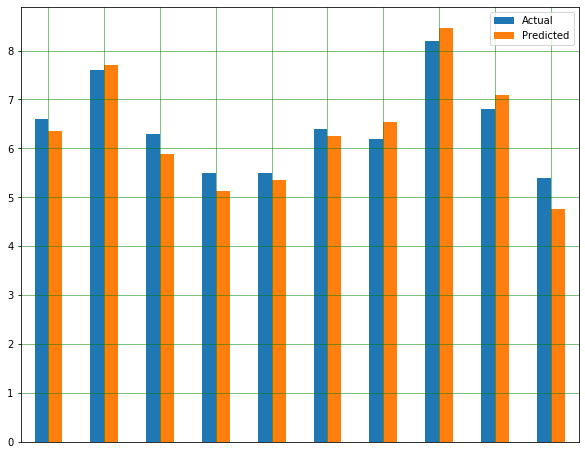

In [227]:
# Predicted VS. Actual Bar Chart
predicted_actual_sample = predict_actual_df1.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('imdb_rating_predactplot_pt.png')
plt.show()


In [228]:
X.describe()

,budget_USD,usa_gross_income,duration,genre_1,genre_2,genre_3,country_1,country_2,country_3,director,...,listing_3,votes,male_avg_rating,female_avg_rating,reviews_from_users,reviews_from_critics,avg_rating_<18yrs,avg_rating_18-30yrs,avg_rating_30-45yrs,avg_rating_>45yrs
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,...,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,86.274227,242.000000,35.830928,2.465979,4.880412,8.956701,25.938144,21.742268,26.678351,183.084536,...,2.498969,242.000000,31.692784,28.435052,170.020619,140.290722,36.080412,35.094845,30.443299,29.583505
std,39.803197,140.151704,18.190574,2.483287,3.616726,4.701435,9.605240,14.210983,18.037829,104.366007,...,1.003351,140.151704,9.147463,8.451760,104.285822,81.177772,11.249781,9.479168,9.013957,8.421719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,121.000000,22.000000,0.000000,1.000000,5.000000,22.000000,13.000000,13.000000,90.000000,...,3.000000,121.000000,26.000000,23.000000,82.000000,71.000000,29.000000,29.000000,25.000000,24.000000
50%,88.000000,242.000000,34.000000,2.000000,5.000000,8.000000,31.000000,14.000000,23.000000,187.000000,...,3.000000,242.000000,32.000000,29.000000,158.000000,139.000000,38.000000,36.000000,31.000000,30.000000
75%,115.000000,363.000000,47.000000,4.000000,6.000000,13.000000,32.000000,40.000000,48.000000,273.000000,...,3.000000,363.000000,39.000000,35.000000,257.000000,204.000000,45.000000,42.000000,37.000000,36.000000
max,164.000000,484.000000,87.000000,9.000000,15.000000,17.000000,33.000000,43.000000,52.000000,359.000000,...,3.000000,484.000000,51.000000,46.000000,369.000000,301.000000,58.000000,55.000000,50.000000,48.000000


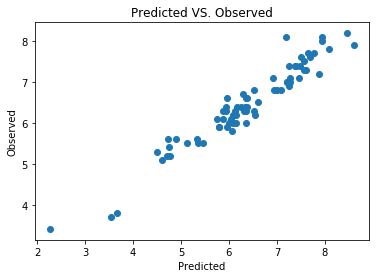

In [231]:
# Scatter plot
plt.scatter(y_pred1, y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('imdb_rating_obvVSpred_pt.png')
# plt.scatter(X_test_scaled, y_test)
# plt.plot([x_min, x_max], [y_min, y_max], c='red')


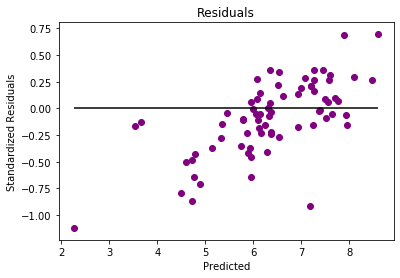

In [232]:
# Residuals
plt.scatter(y_pred1, y_pred1-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred1.min(), xmax=y_pred1.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('imdb_rating_resid_pt.png')
plt.show()

# Model 2

In [233]:
# X = df[['budget_USD', 'genre_1', 'country_1','production_company','actor_1', 'actor_2', 'actor_3']].apply(LabelEncoder().fit_transform)
# y = df['metascore']

In [234]:
# X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','production_company','Ranking_1', 'Ranking_2', 'Ranking_3', 'votes','percentage_male', 'percentage_female',
#         'percentage<18yrs', 'percentage18-30yrs', 'percentage30-45yrs', 'percentage>45yrs']].apply(LabelEncoder().fit_transform)
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
y = df2['metascore']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(485, 23) (485,)


In [235]:
# X = df[['budget_USD', 'usa_gross_income','duration','genre_1', 'country_1','director','production_company','Ranking_1', 'Ranking_2', 'Ranking_3','votes', 'male_avg_rating', 'female_avg_rating', 
#          'avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
# y = df['metascore']
# print(X.shape, y.shape)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [237]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [238]:
regressor2 = LinearRegression()  
regressor2.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [239]:
coeff_df2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  
coeff_df2

,Coefficient
budget_USD,-17.038740
usa_gross_income,14.845453
duration,0.089903
genre_1,3.786613
genre_2,-3.184674
genre_3,-5.628658
country_1,0.230912
country_2,-2.297214
country_3,0.597775
director,4.369786


In [240]:
y_pred2 = regressor2.predict(X_test_scaled)

In [241]:
predict_actual_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predict_actual_df2

,Actual,Predicted
806,60.0,52.211267
2624,68.0,71.834086
2196,56.0,63.719339
1799,30.0,53.577086
1540,48.0,38.634075
...,...,...
783,62.0,61.682088
2089,41.0,46.636591
3868,23.0,36.070763
3018,81.0,65.766018


In [242]:
predict_actual_error2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2,  "Error": y_pred2 - y_test})[["Predicted", "Actual", "Error"]]
predict_actual_error2.head(10)

,Predicted,Actual,Error
806,52.211267,60.0,-7.788733
2624,71.834086,68.0,3.834086
2196,63.719339,56.0,7.719339
1799,53.577086,30.0,23.577086
1540,38.634075,48.0,-9.365925
2036,53.011724,71.0,-17.988276
3648,52.460111,44.0,8.460111
1741,66.031526,62.0,4.031526
3166,67.095456,73.0,-5.904544
2818,33.922655,39.0,-5.077345


In [243]:
regressor2.score(X_test_scaled, y_test)

0.6180979791489739

In [244]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 126.42268357044844
R-squared (R2 ): 0.6180979791489739


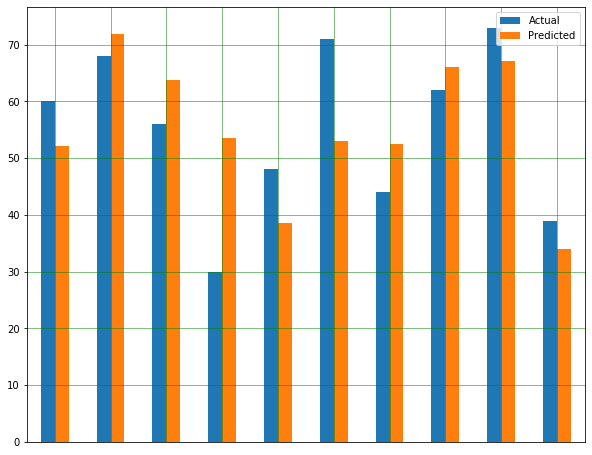

In [245]:
predicted_actual_sample = predict_actual_df2.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('metascore_predactplot_pt.png')
plt.show()

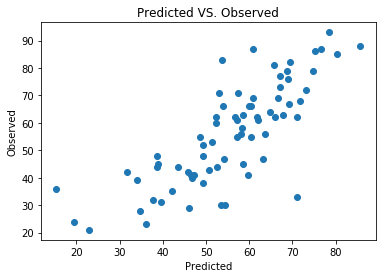

In [248]:
plt.scatter(y_pred2,y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('metascore_obvVSpred_pt.png')

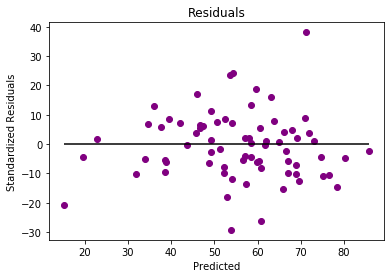

In [249]:
# Residuals
plt.scatter(y_pred2, y_pred2-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred2.min(), xmax=y_pred2.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('metascore_resid_pt.png')
plt.show()

# Model 3

In [250]:
# X = df[['budget_USD', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']].apply(LabelEncoder().fit_transform)
# X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','production_company','Ranking_1', 'Ranking_2', 'Ranking_3', 'votes', 'percentage_male', 'percentage_female',
#         'percentage<18yrs', 'percentage18-30yrs', 'percentage30-45yrs', 'percentage>45yrs']].apply(LabelEncoder().fit_transform)
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
y = df2['worlwide_gross_income']

In [251]:
# X = df2[['budget_USD', 'usa_gross_income', 'worlwide_gross_income', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']].values.reshape[-1,1]
# # X = df['usa_gross_income']
# y = df2['IMDB_rating'].values.reshape[-1,1]
# print(X.shape, y.shape)

In [252]:
# # X = df[['budget_USD', 'genre_1', 'country_1','actor_1', 'actor_2', 'actor_3']].values.reshape[-1,1]
# X = df['budget_USD'].values
# y = df['IMDB_rating'].values
# print(X.shape, y.shape)

In [253]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# # x[:, 0] = labelencoder.fit_transform(x[:, 0])
# labelencoder.fit(X)

In [254]:
# labelencoder.transform(X)

In [255]:
#  Setting up testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [256]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [257]:
#  Training model
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [258]:
# Getting regression coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
budget_USD,1.025004e+08
usa_gross_income,3.075982e+08
duration,2.551548e+07
genre_1,-2.242542e+07
genre_2,-8.447416e+07
genre_3,7.572449e+07
country_1,-3.865203e+07
country_2,-2.316585e+07
country_3,-4.308544e+07
director,8.865439e+06


In [259]:
# Predicting y
y_pred = regressor.predict(X_test_scaled)

In [260]:
# Predicted vs. Actual
predict_actual_error = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Error':y_pred - y_test})
predict_actual_error.head(10)

,Actual,Predicted,Error
806,4762310.0,-7.117760e+07,-7.593991e+07
2624,481800873.0,4.700011e+08,-1.179981e+07
2196,29506464.0,6.830555e+07,3.879909e+07
1799,91196419.0,6.637664e+07,-2.481978e+07
1540,73498611.0,1.945727e+08,1.210740e+08
2036,103071337.0,1.213080e+08,1.823664e+07
3648,356700357.0,3.120805e+08,-4.461987e+07
1741,132511035.0,3.030496e+08,1.705385e+08
3166,36233517.0,4.936755e+07,1.313403e+07
2818,240159255.0,3.170545e+08,7.689528e+07


In [261]:
predict_actual_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [262]:
from sklearn.metrics import mean_squared_error, r2_score
# predicted = regressor.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2.3112704896626884e+16
R-squared (R2 ): 0.571143017059741


In [263]:
regressor.score(X_test_scaled, y_test)

0.571143017059741

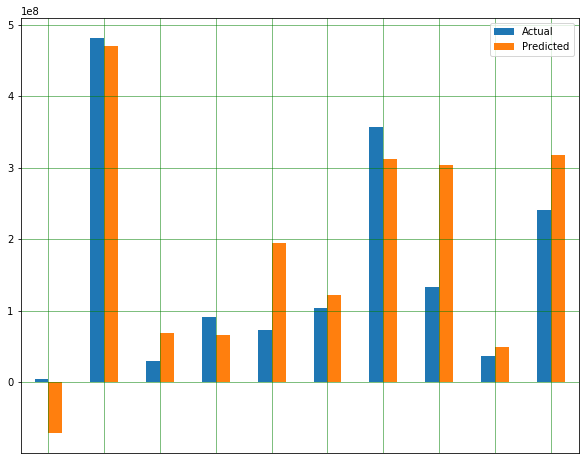

In [264]:
predicted_actual_sample = predict_actual_df.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('wgi_predactplot_pt.png')
plt.show()

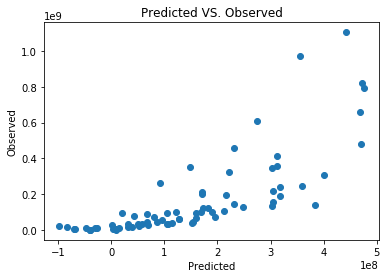

In [268]:
plt.scatter(y_pred,y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('wgi_obvVSpred_pt.png')

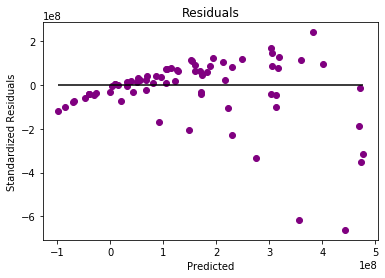

In [269]:
# Residuals
plt.scatter(y_pred, y_pred-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('wgi_resid_pt.png')
plt.show()

# Model 4***


In [81]:
X = df2[['budget_USD', 'usa_gross_income','duration','genre_1', 'genre_2', 'genre_3', 'country_1','country_2', 'country_3','director','production_company','listing_1', 'listing_2', 'listing_3','votes', 'male_avg_rating', 'female_avg_rating', 
         'reviews_from_users','reviews_from_critics','avg_rating_<18yrs', 'avg_rating_18-30yrs', 'avg_rating_30-45yrs', 'avg_rating_>45yrs']].apply(LabelEncoder().fit_transform)
y = df2['overall_eval']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [83]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
regressor4 = LinearRegression()  
regressor4.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
coeff_df = pd.DataFrame(regressor4.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
budget_USD,-0.163316
usa_gross_income,-0.088335
duration,0.127089
genre_1,0.011984
genre_2,-0.120551
genre_3,0.069809
country_1,-0.066226
country_2,0.038003
country_3,0.009449
director,0.010331


In [86]:
y_pred4 = regressor4.predict(X_test_scaled)

In [87]:
predict_actual_df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predict_actual_df4

,Actual,Predicted
806,0,0.530333
2624,1,0.949958
2196,0,0.297448
1799,0,-0.046019
1540,0,0.046278
...,...,...
783,1,1.080288
2089,0,0.382619
3868,0,0.059408
3018,1,0.608934


In [88]:
regressor4.score(X_test_scaled, y_test)

0.6592960426144988

In [89]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.08388132709509805
R-squared (R2 ): 0.6592960426144988


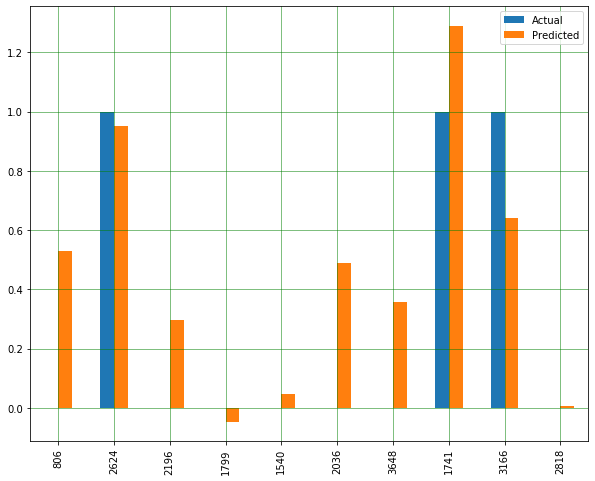

In [92]:
predicted_actual_sample = predict_actual_df4.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [95]:
# plt.(y_test,y_pred4)

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

In [76]:
# X5 = df2[['metascore','avg_user_rating']]
# y = df2['overall_eval']

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(X5)
# y_kmeans = kmeans.predict(X)
# plt.scatter(X5[:, 0], X5[:, 1], c=y_kmeans, s=50, cmap='viridis')

# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);